In [1]:
import cv2

from PIL import Image
from IPython.display import display

import detect

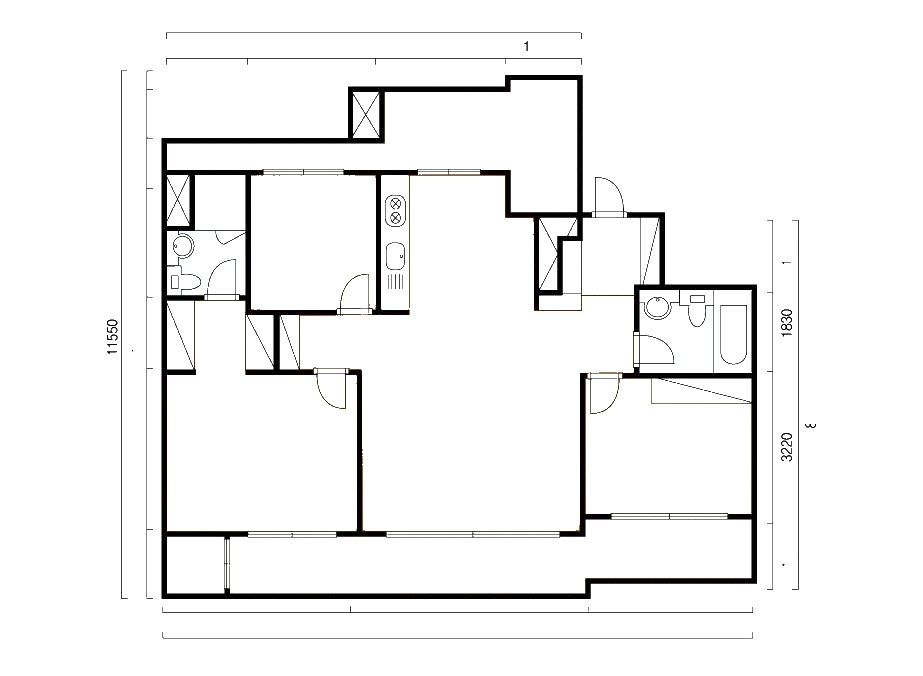

In [2]:
# 이미지 읽기
img_path = "output.png"
img = cv2.imread(img_path)

display(Image.fromarray(img))

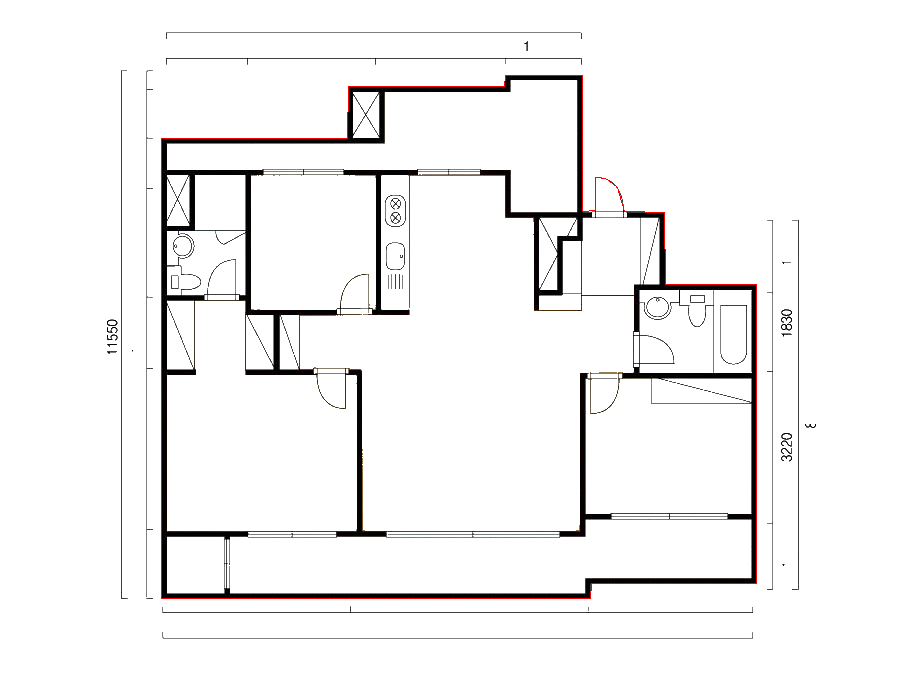

In [5]:
# Create blank image
height, width, channels = img.shape
blank_image = img.copy()

# Grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# display(Image.fromarray(gray))

# detect outer Contours (simple floor or roof solution), paint them red on blank_image
contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))
# print(contour)
# Display
display(Image.fromarray(blank_image))

19


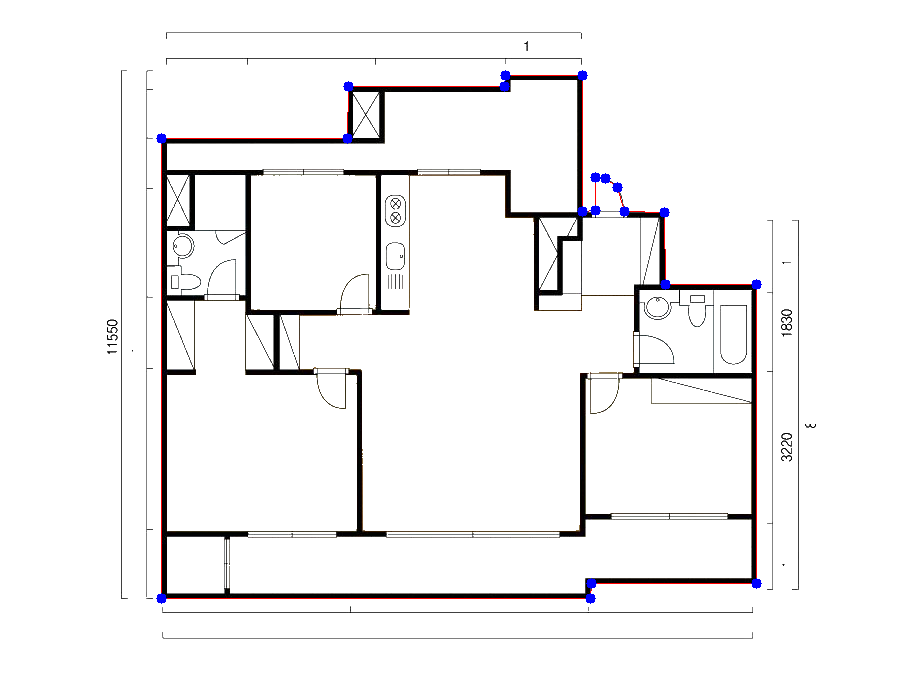

In [19]:
contour_image = blank_image.copy()

print(len(contour))
for point in contour:
    point = point[0]  # 원하는 좌표를 이 변수에 설정하세요.

    color = (0, 0, 255)
    cv2.circle(contour_image, point, 5, color, -1)

display(Image.fromarray(contour_image))

In [28]:
all = [i[0] for i in contour]
x = [i[0][0] for i in contour]
y = [i[0][1] for i in contour]
print(min(x), min(y))

161 75


point_1 : (161, 75) / point_2 : (756, 598)


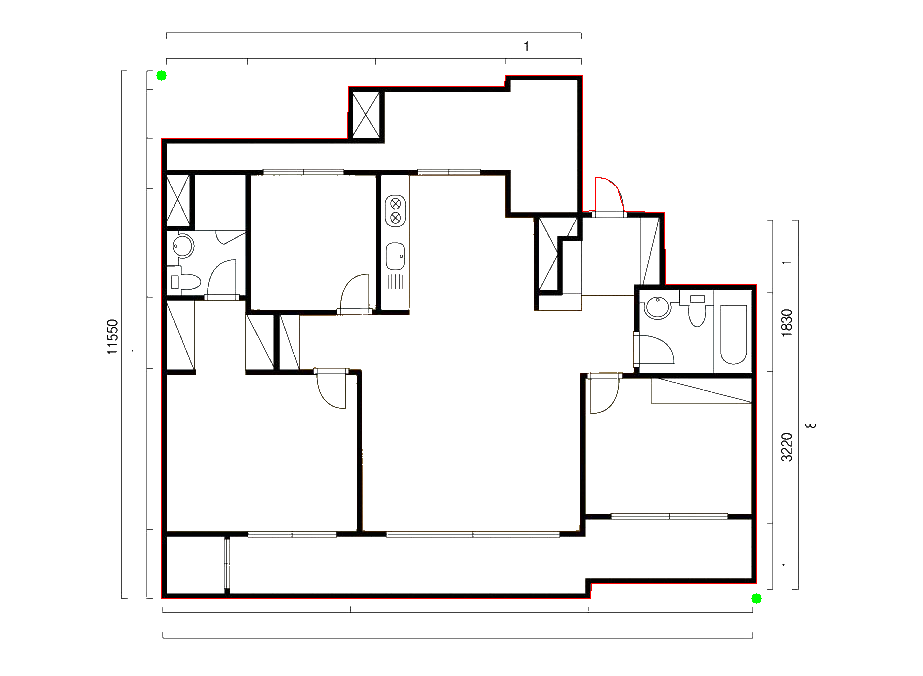

In [31]:
min_max_image = blank_image.copy()

x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

point_1 = (x_min, y_min)
point_2 = (x_max, y_max)

print(f'point_1 : {point_1} / point_2 : {point_2}')
# print(len(contour))
# for point in contour:
#     point = point[0]  # 원하는 좌표를 이 변수에 설정하세요.

color = (0, 255, 0)
cv2.circle(min_max_image, point_1, 5, color, -1)
cv2.circle(min_max_image, point_2, 5, color, -1)

display(Image.fromarray(min_max_image))

In [41]:
import os
from PIL import Image
import numpy as np

path = '20231021_first_output_img'
img_list = os.listdir(path)

for name in img_list:
    file_path = f'{path}/{name}'
    im = Image.open(file_path)
    width, height = im.size

    if width != 923 or height != 676:
        print(f'{name} : {width}, {height}')

        image = cv2.imread(file_path)

        original_height, original_width = image.shape[:2]

        # 여백을 추가한 후의 총 너비를 계산합니다. 여기서는 양쪽에 10픽셀씩 추가하므로 20을 더합니다.
        new_width = original_width + 20  # 10 pixels on each side

        # 이미지의 새 버전을 생성합니다. 여기서는 흰색 여백과 함께 할 것입니다.
        # 먼저, 흰색 배경의 새 이미지를 생성합니다.
        new_image = np.ones((original_height, new_width, 3), dtype=np.uint8) * 255  # 흰색 배경

        # 원본 이미지를 새 이미지의 중앙에 위치시킵니다.
        # 여기서는 x 좌표 시작점을 10으로 설정하여 이미지를 붙입니다.
        start_x = 10  # 시작점 (10픽셀 여백으로 인한)
        new_image[:, start_x:start_x + original_width] = image  # 원본 이미지 복사

        # 결과 저장 또는 표시
        cv2.imwrite(file_path, new_image)  # 파일로 저장


image_196_OCR.png : 903, 676
image_207_OCR.png : 903, 676
image_213_OCR.png : 903, 676
image_215_OCR.png : 903, 676


In [42]:
import os
from PIL import Image
import numpy as np

path = '20231021_first_output_img'
img_list = os.listdir(path)

for name in img_list:
    file_path = f'{path}/{name}'
    im = Image.open(file_path)
    width, height = im.size

    if width != 923 or height != 676:
        print(f'{name} : {width}, {height}')

point_1 : (161, 75) / point_2 : (756, 598)


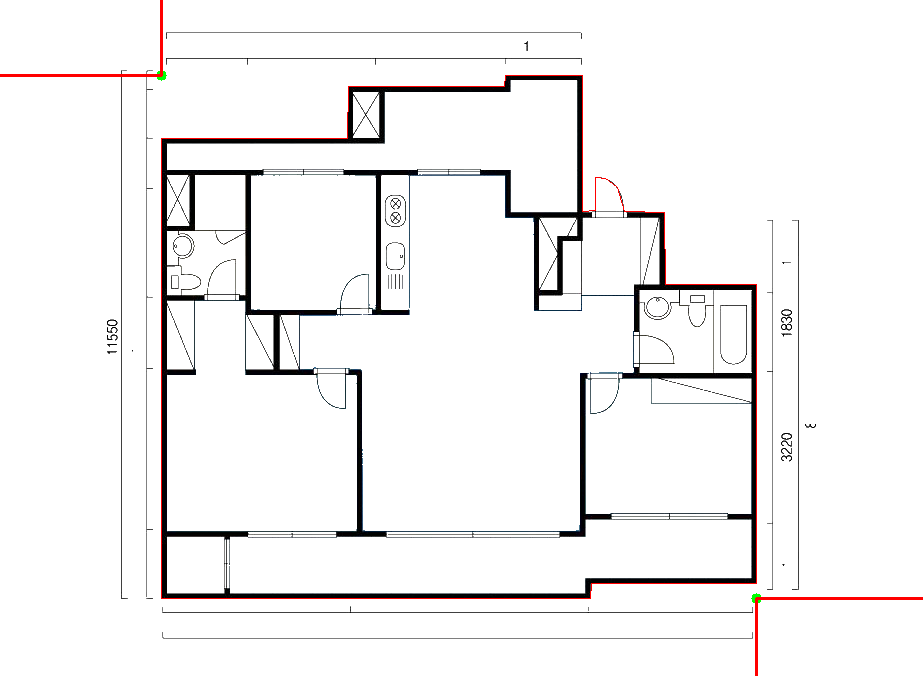

In [61]:
path = '20231021_first_output_img'
img_list = os.listdir(path)

file_path = f'{path}/{img_list[1]}'
img = cv2.imread(file_path)
height, width = image.shape[:2]

blank_image = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))

x = [i[0][0] for i in contour]
y = [i[0][1] for i in contour]

min_max_image = blank_image.copy()

x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

point_1 = (x_min, y_min)
point_2 = (x_max, y_max)

print(f'point_1 : {point_1} / point_2 : {point_2}')

color = (0, 255, 0)

# cv2.circle(min_max_image, (100,100), 5, color, -1)

cv2.circle(min_max_image, point_1, 5, color, -1)
cv2.circle(min_max_image, point_2, 5, color, -1)
cv2.line(min_max_image, (0, y_min), (x_min, y_min), (255, 0, 0), 2)
cv2.line(min_max_image, (x_min, 0), (x_min, y_min), (255, 0, 0), 2)
cv2.line(min_max_image, (x_max, y_max), (width, y_max), (255, 0, 0), 2)
cv2.line(min_max_image, (x_max, y_max), (x_max, height), (255, 0, 0), 2)

padding_top, padding_left, padding_right, padding_bottom = y_min, x_min, width-x_max, height-y_max

display(Image.fromarray(min_max_image))

top : 75 / left : 161 / right : 167 / bottom : 78


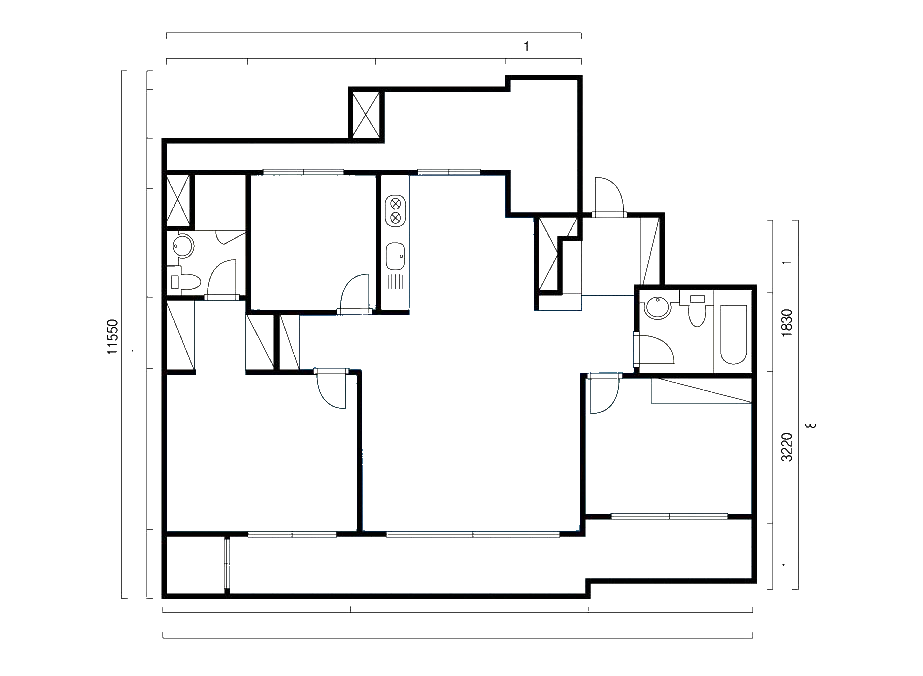

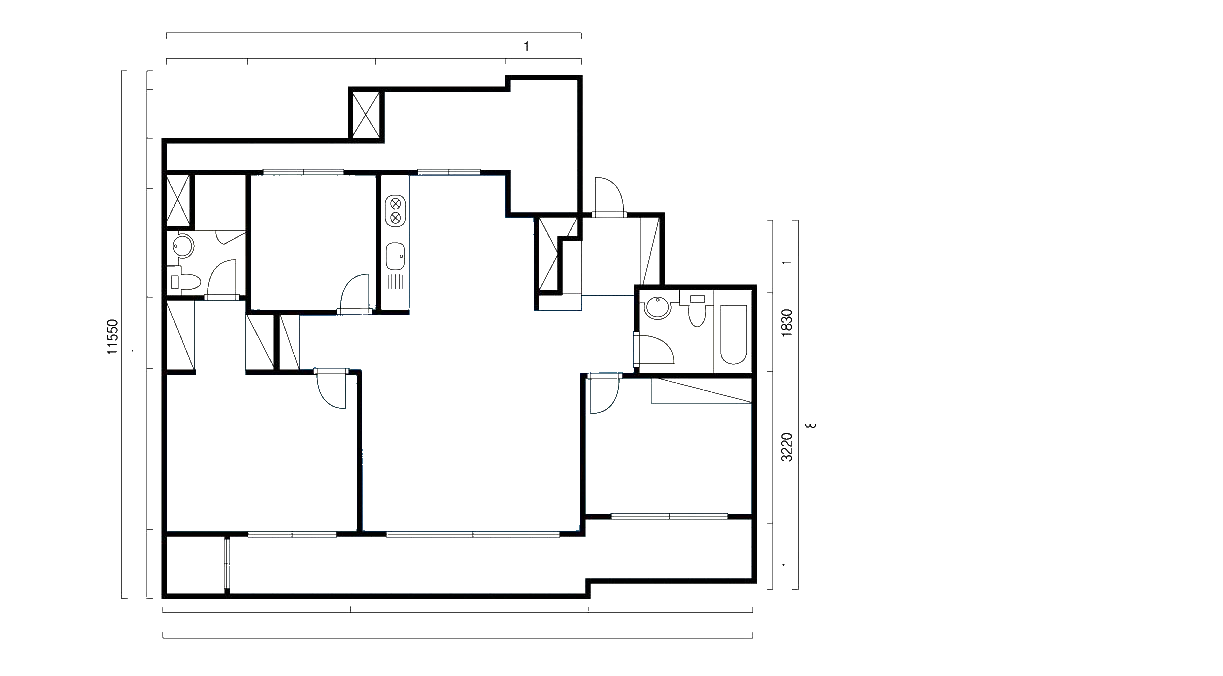

In [78]:
path = '20231021_first_output_img'
img_list = os.listdir(path)


file_path = f'{path}/{img_list[1]}'
img = cv2.imread(file_path)
height, width = image.shape[:2]

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))

x = [i[0][0] for i in contour]
y = [i[0][1] for i in contour]

x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

padding_top, padding_left, padding_right, padding_bottom = y_min, x_min, width-x_max, height-y_max
print(f'top : {padding_top} / left : {padding_left} / right : {padding_right} / bottom : {padding_bottom}')

display(Image.fromarray(img))
padding = 300
new_width = width + padding

new_image = np.ones((height, new_width, 3), dtype=np.uint8) * 255  # 흰색 배경
new_image[:, :width] = img  # right
# new_image[:, padding:] = img  # left

display(Image.fromarray(new_image))

In [74]:
def get_padding(image):
    height, width = image.shape[:2]
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))

    x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
    y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

    padding_top, padding_left, padding_right, padding_bottom = y_min, x_min, width-x_max, height-y_max

    return [padding_top, padding_left, padding_right, padding_bottom]

top : 17 / left : 32 / right : 30 / bottom : 23


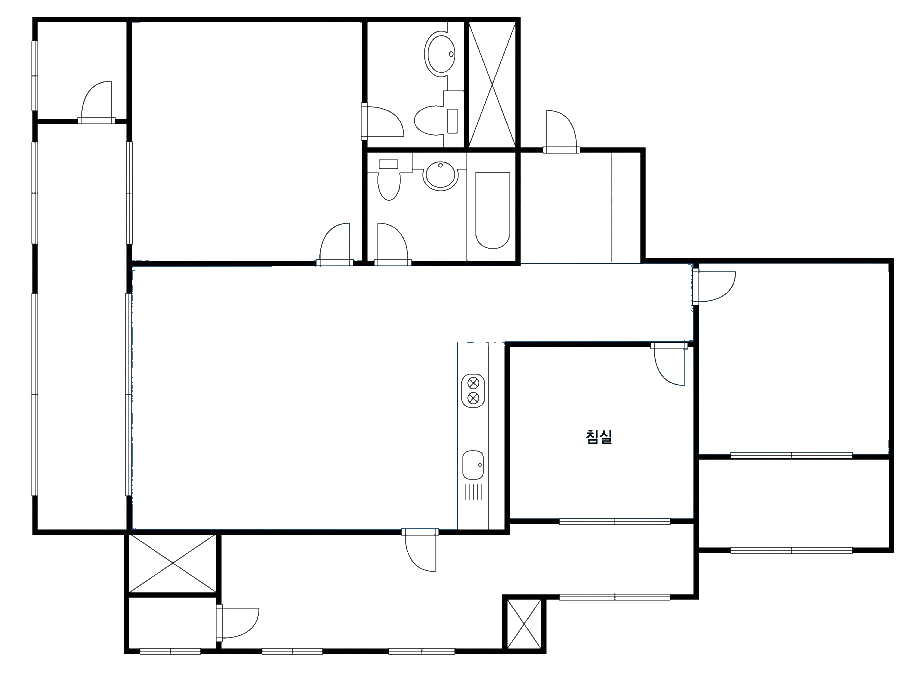

top : 17 / left : 32 / right : 160 / bottom : 23


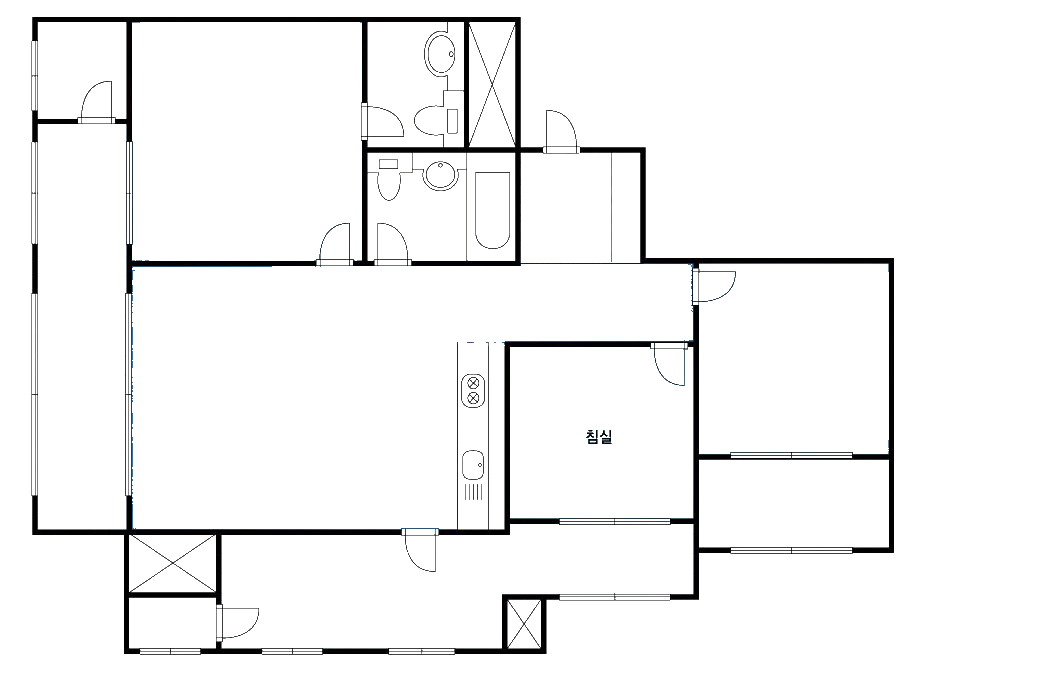

In [81]:
path = '20231021_first_output_img'
img_list = os.listdir(path)

file_path = f'{path}/{img_list[5]}'
img = cv2.imread(file_path)

# padding_top, padding_left, padding_right, padding_bottom = get_padding(img)
padding_T_L_R_B = get_padding(img)
print(f'top : {padding_T_L_R_B[0]} / left : {padding_T_L_R_B[1]} / right : {padding_T_L_R_B[2]} / bottom : {padding_T_L_R_B[3]}')

default_padding = [160, 70]

display(Image.fromarray(img))

if default_padding[0] > padding_T_L_R_B[2]:
    padding = default_padding[0] - padding_T_L_R_B[2]
    new_width = width + padding

    new_image = np.ones((height, new_width, 3), dtype=np.uint8) * 255  # 흰색 배경
    new_image[:, :width] = img  # right

    padding_T_L_R_B_new = get_padding(new_image)
    print(f'top : {padding_T_L_R_B_new[0]} / left : {padding_T_L_R_B_new[1]} / right : {padding_T_L_R_B_new[2]} / bottom : {padding_T_L_R_B_new[3]}')
    display(Image.fromarray(new_image))

In [ ]:
path = '20231021_first_output_img'
img_list = os.listdir(path)

file_path = f'{path}/{img_list[5]}'
img = cv2.imread(file_path)

# padding_top, padding_left, padding_right, padding_bottom = get_padding(img)
padding_T_L_R_B = get_padding(img)
print(f'top : {padding_T_L_R_B[0]} / left : {padding_T_L_R_B[1]} / right : {padding_T_L_R_B[2]} / bottom : {padding_T_L_R_B[3]}')

default_padding = [160, 70]

display(Image.fromarray(img))

if default_padding[0] > padding_T_L_R_B[2]:
    padding = default_padding[0] - padding_T_L_R_B[2]
    new_width = width + padding

    new_image = np.ones((height, new_width, 3), dtype=np.uint8) * 255  # 흰색 배경
    new_image[:, :width] = img  # right

    padding_T_L_R_B_new = get_padding(new_image)
    print(f'top : {padding_T_L_R_B_new[0]} / left : {padding_T_L_R_B_new[1]} / right : {padding_T_L_R_B_new[2]} / bottom : {padding_T_L_R_B_new[3]}')
    display(Image.fromarray(new_image))



# 상하좌우 패딩 값을 지정합니다.
top_padding = 30
bottom_padding = 50
left_padding = 20
right_padding = 10

# 새로운 이미지의 크기를 계산합니다.
new_height = original_height + top_padding + bottom_padding
new_width = original_width + left_padding + right_padding

# 새로운 이미지를 생성합니다 (흰색 배경).
new_image = np.ones((new_height, new_width, 3), dtype=np.uint8) * 255  # 흰색 배경

# 원본 이미지를 새 이미지의 중앙에 위치시킵니다.
start_x = left_padding
start_y = top_padding
end_x = start_x + original_width
end_y = start_y + original_height
new_image[start_y:end_y, start_x:end_x] = image  # 원본 이미지 복사




In [84]:
def get_contour_size(image):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))

    x_min, x_max = min([i[0][0] for i in contour]), max([i[0][0] for i in contour])
    y_min, y_max = min([i[0][1] for i in contour]), max([i[0][1] for i in contour])

    return [x_max-x_min, y_max-y_min]


In [87]:
import cv2
import numpy as np

def resize_with_padding(img, scale_percent=60):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    background = np.ones_like(img) * 255  # 모든 픽셀을 흰색으로 설정합니다.

    # 줄어든 이미지를 배경 이미지의 중앙에 배치합니다.
    # 이를 위해 좌표를 계산합니다.
    center_x = (img.shape[1] - width) // 2
    center_y = (img.shape[0] - height) // 2

    # 배경 이미지 위에 리사이즈된 이미지를 붙입니다.
    background[center_y:center_y+height, center_x:center_x+width] = resized

    return background

x : 861 / y : 636
56.5


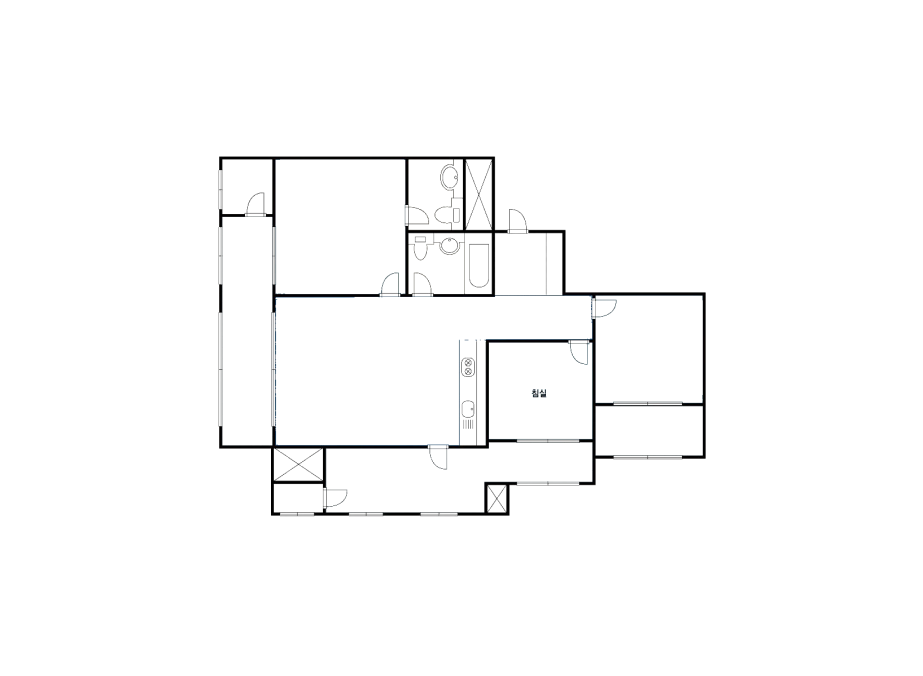

top : 17 / left : 32 / right : 30 / bottom : 23


In [100]:
path = '20231021_first_output_img'
img_list = os.listdir(path)

file_path = f'{path}/{img_list[5]}'
img = cv2.imread(file_path)

contour_size = get_contour_size(img)
print(f'x : {contour_size[0]} / y : {contour_size[1]}')

# display(Image.fromarray(img))

default_size = [600, 536]

if default_size[0] < contour_size[0] and default_size[1] < contour_size[1]:
    ratio = 100 - max([(contour_size[0] - default_size[0]) / default_size[0], (contour_size[1] - default_size[1]) / default_size[1]])*100
    print(ratio)

    resize_img = resize_with_padding(img, scale_percent=ratio)
    display(Image.fromarray(resize_img))

padding_T_L_R_B = get_padding(resize_img)
print(f'top : {padding_T_L_R_B[0]} / left : {padding_T_L_R_B[1]} / right : {padding_T_L_R_B[2]} / bottom : {padding_T_L_R_B[3]}')
